<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/PUT_Ago_24_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Implementation of Black-Scholes formula in Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Parâmetros
S = np.linspace(25, 45, 100)  # Variação do preço do ativo
Kp = 37.5  # Preço de exercício
r = 0.10  # Taxa de juros livre de risco
σ = 0.25  # Volatilidade
sigma = σ

S1 = 37.5  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
T = (40/t)  # Tempo até o vencimento em dias

In [ ]:
# Fórmulas de d1 e d2
d1 = (np.log(S / Kp) + (r + σ**2 / 2) * T) / (σ * np.sqrt(T))
d2 = d1 - σ * np.sqrt(T)

# Preço da opção de venda
PUT = Kp * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

Call = S * norm.cdf(d1) - Kp * np.exp(-r * T) * norm.cdf(d2)

In [ ]:
# Função para calcular o preço de uma opção de compra (call) usando o modelo Black-Scholes
def black_scholes_call(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - Kp * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Função para calcular o preço de uma opção de venda (put) usando o modelo Black-Scholes
def black_scholes_put(S, Kp, T, r, sigma):
    d1 = (np.log(S / Kp) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = Kp * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Função para calcular o preço da opção baseado no tipo (call ou put)
def black_scholes_option(S, Kp, T, r, sigma, option_type='call'):
    if option_type == 'call':
        return black_scholes_call(S, Kp, T, r, sigma)
    elif option_type == 'put':
        return black_scholes_put(S, Kp, T, r, sigma)
    else:
        raise ValueError("option_type deve ser 'call' ou 'put'")

In [ ]:
S1 = 38.5  # Preço atual do ativo subjacente
option_type = 'put'  # Tipo da opção ('call' ou 'put')

prices = black_scholes_option(S, Kp, T, r, sigma, option_type)

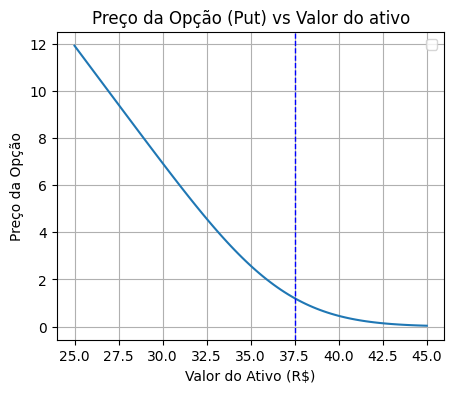

In [ ]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, prices)
plt.axvline(x=Kp,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo (R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

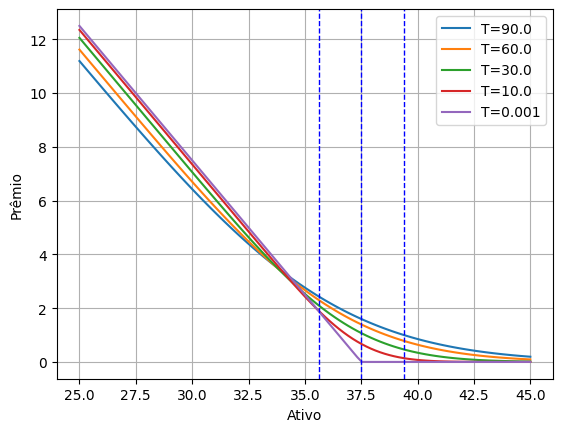

<Figure size 500x400 with 0 Axes>

In [ ]:
# Solução de BS para diferentes prazos
for Ti in [90/252,60/252,30.0/252,10/252,0.001/252]:
  y = black_scholes_option(S, Kp, Ti, r, sigma, option_type)
  plt.plot(S,y,label=r'T='+str(Ti*252))

plt.axvline(x=Kp,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=Kp*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=Kp*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

PUT Comprada

In [ ]:
# Plot do gráfico da PETR4 (Stk =38.17 / DTE= 45 - 18_10 / Comprado / P= 0.97 / SPT = 38.5 / 19_08)
# Parâmetros
S = np.linspace(30, 50, 100)  # Variação do preço do ativo
Kpc = 38.17  # Preço de exercício
r = 0.105  # Taxa de juros livre de risco
σ = 0.2235  # Volatilidade
sigma = σ
S1 = 37.5  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
Tc = (45/t)  # Tempo até o vencimento em dias
option_type = 'put'  # Tipo da opção ('call' ou 'put')

In [ ]:
# Teste de aderência aos prêmios no mercado
#print(f"Preço da opção de {option_type}: {black_scholes_option(38.5, Kpc, T, r, sigma, option_type):.2f}")

In [ ]:
Ppc = black_scholes_option(S1, Kpc, Tc, r, sigma, option_type)
print(Ppc)

1.3922597323167203


Analisando a desvalorização da PUT comprada durante o período de operação (25 DTE).

In [ ]:
# Valor da Put comprada a 45 DTE
Ppc = black_scholes_option(S1, Kpc, Tc, r, sigma, option_type)
Ppc

1.3922597323167203

In [ ]:
# Valor da Put comprada a 20 DTE, que é a data de expiração da Put Vendida.
Tf = 0.00001
DTE = (24.999/252)
Ppcf = black_scholes_option(S1, Kpc, Tc-DTE, r, sigma, option_type)
Ppc0 = black_scholes_option(S1, Kpc, Tc+DTE, r, sigma, option_type)

In [ ]:
# O percentual teórico de desvalorição do período (25 DTE) da PUT Comprada é de ...
#Desv = (Ppcf/Ppc-1)*100
print(f"A desvalorização teórica da {option_type} comprada no período (25 DTE) é de: {(Ppcf/Ppc-1)*100:.2f} %")
print(f"A desvalorização teórica da {option_type} comprada no período (-25 DTE) é de: {(Ppc/Ppc0-1)*100:.2f} %")

A desvalorização teórica da put comprada no período (25 DTE) é de: -18.60 %
A desvalorização teórica da put comprada no período (-25 DTE) é de: -9.94 %


In [ ]:
PUT_comprada = black_scholes_option(S, Kpc, Tc, r, sigma, option_type)-Ppc

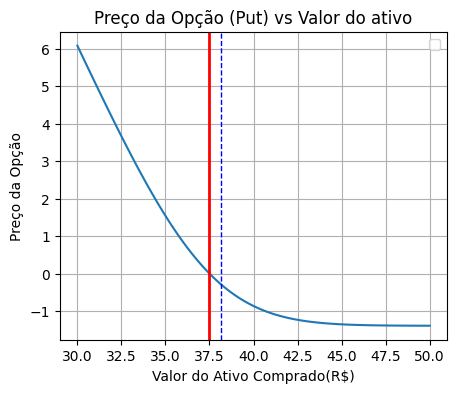

In [ ]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, PUT_comprada)
plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

PUT Vendida

In [ ]:
# Plot do gráfico da PETR4 (Stk =37.67 / DTE= 25 - 20_09 / Vendido / P= 0.58 / SPT = 38.5 / 19_08)
# Parâmetros
S = np.linspace(30, 50, 100)  # Variação do preço do ativo
Kpv = 37.67  # Preço de exercício
r = 0.105  # Taxa de juros livre de risco
σ = 0.228  # Volatilidade
sigma = σ
S1 = 37.5  # Preço atual do ativo subjacente
t = 252    # Tempo do ano em dias
Tv = (25/t)  # Tempo até o vencimento em dias
option_type = 'put'  # Tipo da opção ('call' ou 'put')

In [ ]:
# Teste de aderência aos prêmios no mercado
#print(f"Preço da opção de {option_type}: {black_scholes_option(38.5, Kpv, T, r, sigma, option_type):.2f}")

In [ ]:
Ppv = black_scholes_option(S1, Kpv, Tv, r, sigma, option_type)

PUT_vendida = Ppv - black_scholes_option(S, Kpv, Tf, r, sigma, option_type)
print(Ppv)

0.9643869927344078


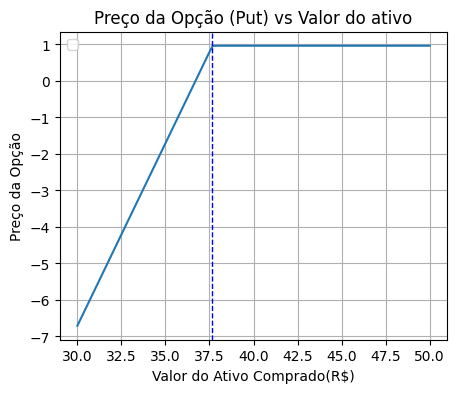

In [ ]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, PUT_vendida)
plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Estrategia =  PUT_comprada + PUT_vendida

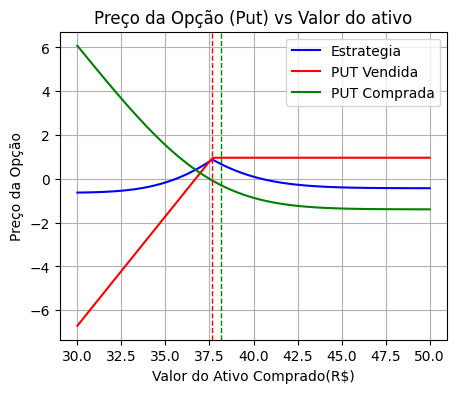

In [ ]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S, Estrategia, label='Estrategia', color='b')
plt.plot(S, PUT_vendida, label='PUT Vendida', color='r')
plt.plot(S, PUT_comprada, label='PUT Comprada', color='g')
plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

O gráfico acima está levemente distorcido porque a Put comprada está com DTE de 45 dias, enquanto que avendida está com DTE de 25 dias.

In [ ]:
#PUT_vendida = Ppv - black_scholes_option(S, Kpc, Tv, r, sigma, option_type)
#PUT_comprada = black_scholes_option(S, Kpc, Tc, r, sigma, option_type)-Ppc

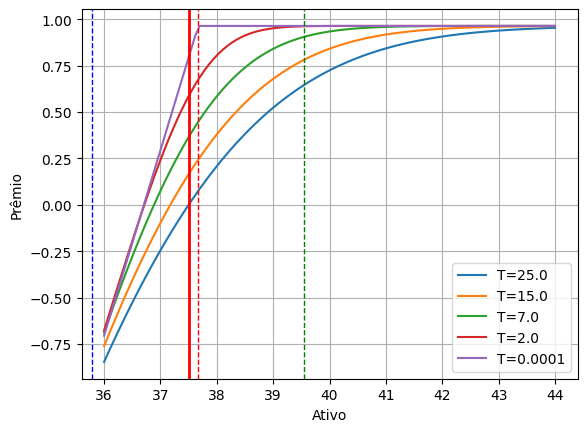

<Figure size 500x400 with 0 Axes>

In [ ]:
S = np.linspace(36, 44, 100)  # Variação do preço do ativo

# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida1 = Ppv - black_scholes_option(S, Kpv, Ti, r, sigma, option_type)
  plt.plot(S,PUT_vendida1,label=r'T='+str(Ti*252))

plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv*(1+0.05),ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

Variações de 5% no preço do ativo podem causar grandes variações no preço do derivativo, conforme pode ser observado plas retas verticais paralelas ao preço spot do ativo.

O gráfico abaixo é o resultado dos valores das duas puts ao longo da variação do ativo. Quando o ativo está acima de R\$ 44,00 o valores tendem aos -R\$ 0,4 que é a diferença entre o prêmio pago R\$ 0,9736 e recebido R\$ 0,5824. \\
Quando o ativo está abaixo de R\$ 32,00 o valores tendem aos -R\$ 0,2 que é a diferença entre duas retas dos prêmios pago e recebido.

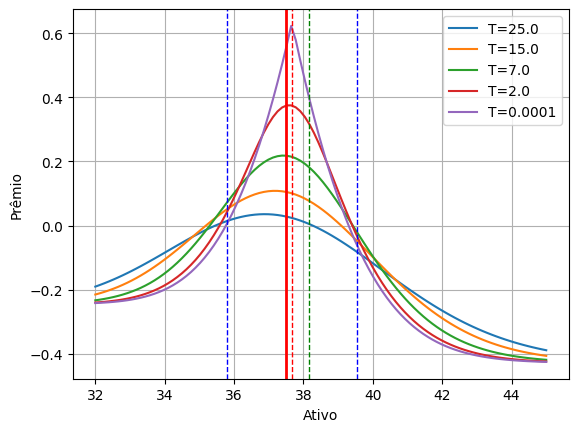

<Figure size 500x400 with 0 Axes>

In [ ]:
S = np.linspace(32, 45, 100)  # Variação do preço do ativo
Peso1 = 1
# Peso acima de 1 (> Qtde de PUT Vendida) a reta é de decrescimento com a redução do preço do ativo.
# Peso abaixo de 1 (> Qtde de PUT Comprada) a reta é de crescimento com a redução do preço do ativo.

# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida = (Ppv - black_scholes_option(S, Kpv, Ti, r, sigma, option_type))*Peso1
  PUT_comprada = black_scholes_option(S, Kpc, Ti+(20/252), r, sigma, option_type)-Ppc
  Estrategia1 =  PUT_comprada + PUT_vendida
  #plt.plot(S,PUT_vendida,label=r'T='+str(Ti*252))
  #plt.plot(S,PUT_comprada,label=r'T='+str(Ti*252))
  plt.plot(S,Estrategia1,label=r'T='+str(Ti*252))

plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

In [ ]:
Ppvd = black_scholes_option(S1, Kpv, Tv, r, sigma, option_type)
Ppvd

0.9643869927344078

In [ ]:
Ppcd = black_scholes_option(S1, Kpc, Tc, r, sigma, option_type)
Ppcd

1.4206594386800155

In [ ]:
Peso = Ppcd/Ppvd
print(f"Quantidade de puts compradas: {Peso : .2f} vezes a quantidade de puts vendidas")

Quantidade de puts compradas:  1.47 vezes a quantidade de puts vendidas


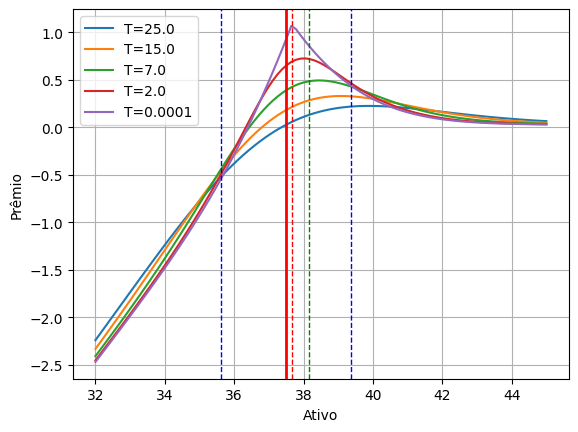

<Figure size 500x400 with 0 Axes>

In [ ]:
S = np.linspace(32, 45, 100)  # Variação do preço do ativo
# O Peso considera que a quantidade de Puts vendidas é diferente da comprada numa razão
# de Put comprada / Put Vendida, o que acaba distorcendo o resultado final do gráfico de payoff.

# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida = (Ppv - black_scholes_option(S, Kpv, Ti, r, sigma, option_type))*Peso
  PUT_comprada = black_scholes_option(S, Kpc, Ti+(20/252), r, sigma, option_type)-Ppc
  Estrategia1 =  PUT_comprada + PUT_vendida
  #plt.plot(S,PUT_vendida,label=r'T='+str(Ti*252))
  #plt.plot(S,PUT_comprada,label=r'T='+str(Ti*252))
  plt.plot(S,Estrategia1,label=r'T='+str(Ti*252))

plt.axvline(x=Kpc,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

No gráfico acima se considera que os **valores** recebidos das puts vendidas devem ser iguais aos das compradas, levando a operação para **custo zero**. Isso pode ser observado pelo grafico a direita do spot que esta próximo de zero. Entretanto essa estratégia ocasiona uma perda acentuada em caso de queda no valor do ativo, e que pode ser observado na evolução do gráfico a esquerda do spot.
Outra estratégia poderia alterar o ganho em caso de queda (ramo esquerdo do gráfico), mas alteraria os custos da operação (ramo direito do gráfico).

Este mesmo estudo poderia ser feito para o ramo esquerdo do gráfico e mostria a relação entre quantidades vendidas e compradas para uma estratégia de maximizar o ganho em caso de queda, o que aumentaria os custos da operação.

In [ ]:
DTEc = Tc*252
DTEv = Tv*252
Ppve = black_scholes_option(30, Kpv, Tv, r, sigma, option_type)
Ppce = black_scholes_option(30, Kpc, Tc, r, sigma, option_type)
#Peso = Ppce/Ppve
print(f"DTE para comprado ={DTEc : .2f}, DTE para comprado ={DTEv : .2f}" )
print(f"Prêmio de puts compradas em preços inferiores a R$ 30,00 : {Ppve : .2f}, Prêmio de puts vendidas: {Ppce : .2f} vezes a quantidade de puts vendidas.")
print(f"A diferença entre prêmio é um valor de aproximadamente R$ {Ppve-Ppce-0.01 : .2f}")

DTE para comprado = 45.00, DTE para comprado = 25.00
Prêmio de puts compradas em preços inferiores a R$ 30,00 :  7.28, Prêmio de puts vendidas:  7.47 vezes a quantidade de puts vendidas.
A diferença entre prêmio é um valor de aproximadamente R$ -0.20


O que acontece se efastar os estrikes? \

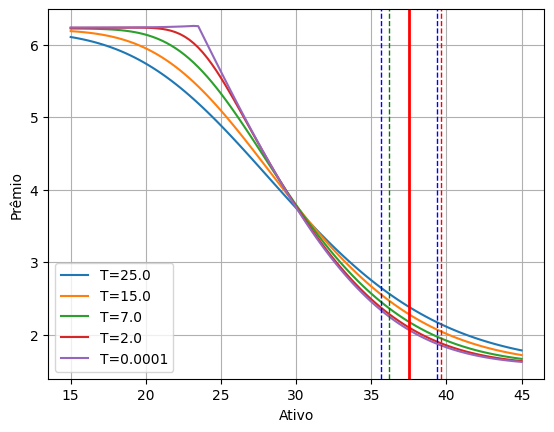

<Figure size 500x400 with 0 Axes>

Prêmio  0.62 de puts compradas :  36.17, Prêmio  2.20 de puts vendidas:  39.67 vezes a quantidade de puts vendidas.


In [ ]:
S2 = np.linspace(15, 45, 100)  # Variação do preço do ativo
# O Peso considera que a quantidade de Puts vendidas é diferente da comprada numa razão
# de Put comprada / Put Vendida, o que acaba distorcendo o resultado final do gráfico de payoff.
Peso2 = 1

Kpv2 = Kpv+2
Kpc2 = Kpc-2

Ppv2 = black_scholes_option(S1, Kpv2, Tv, r, sigma, option_type)
Ppc2 = black_scholes_option(S1, Kpc2, Tc, r, sigma, option_type)

# Solução de BS para diferentes prazos
for Ti in [25/252,15/252,7/252,2/252,0.0001/252]:
  PUT_vendida2 = (Ppv2 - black_scholes_option(S, Kpv-2, Ti, r, sigma, option_type))*Peso2
  PUT_comprada2 = black_scholes_option(S, Kpc+2.5, Ti+(20/252), r, sigma, option_type)-Ppc2
  Estrategia2 =  PUT_comprada2 + PUT_vendida2
  #plt.plot(S2,PUT_vendida,label=r'T='+str(Ti*252))
  #plt.plot(S2,PUT_comprada,label=r'T='+str(Ti*252))
  plt.plot(S2,Estrategia2,label=r'T='+str(Ti*252))

plt.axvline(x=Kpc2,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv2,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1+0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1*(1-0.05),ymin=0,ymax=10.0, color='b', linestyle='dashed',linewidth=1)
plt.axvline(x=S1,ymin=0,ymax=10.0, color='r', linestyle='solid',linewidth=2)
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

print(f"Prêmio {Ppc2 : .2f} de puts compradas : {Kpc2 : .2f}, Prêmio {Ppv2 : .2f} de puts vendidas: {Kpv2 : .2f} vezes a quantidade de puts vendidas.")

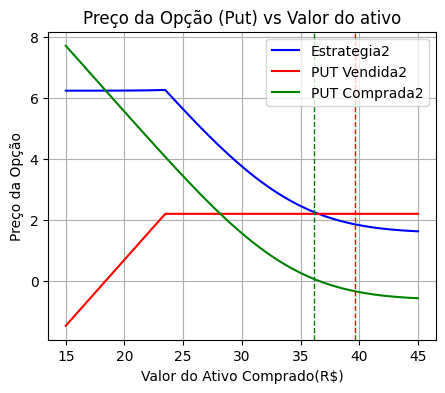

In [ ]:
# Plot do gráfico
plt.figure(figsize=(5, 4))
plt.plot(S2, Estrategia2, label='Estrategia2', color='b')
plt.plot(S2, PUT_vendida2, label='PUT Vendida2', color='r')
plt.plot(S2, PUT_comprada2, label='PUT Comprada2', color='g')
plt.axvline(x=Kpc2,ymin=0,ymax=10.0, color='g', linestyle='dashed',linewidth=1)
plt.axvline(x=Kpv2,ymin=0,ymax=10.0, color='r', linestyle='dashed',linewidth=1)
plt.xlabel('Valor do Ativo Comprado(R$)')
plt.ylabel('Preço da Opção')
plt.title(f'Preço da Opção ({option_type.capitalize()}) vs Valor do ativo')
plt.legend()
plt.grid(True)
plt.show()

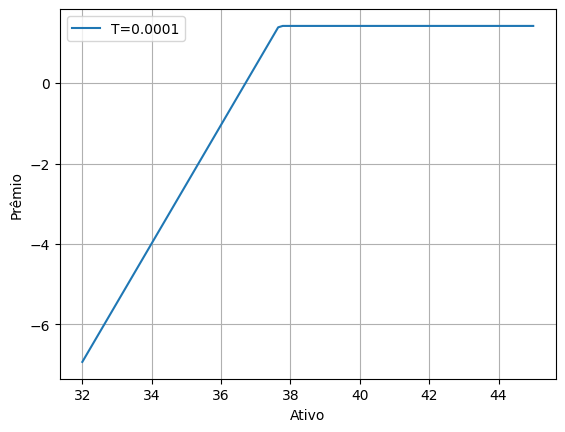

<Figure size 500x400 with 0 Axes>

In [ ]:
plt.plot(S,PUT_vendida,label=r'T='+str(Ti*252))
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

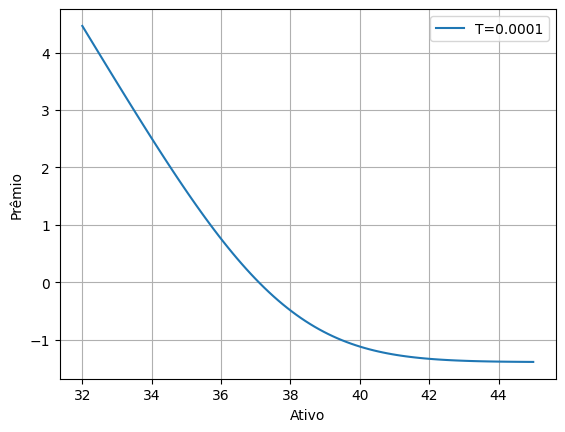

<Figure size 500x400 with 0 Axes>

In [ ]:
plt.plot(S,PUT_comprada,label=r'T='+str(Ti*252))
plt.grid()
plt.legend()
plt.xlabel('Ativo')
plt.ylabel('Prêmio')
plt.figure(figsize=(5, 4))
plt.show()

O que acontece se jogar os strikes mais para fora do dinheiro?